# Import Required Libraries

In [1]:
# Core
library(dplyr)
library(ggplot2)
library(corrplot)
library(summarytools)

# ML
library(caret)
library(randomForest)
library(e1071)
library(xgboost)

# Optional tools
library(Metrics)
library(caTools)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Warning message:
“no DISPLAY variable so Tk is not available”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice



Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




# Load Dataset

In [2]:
data <- read.csv("/kaggle/input/student-performance/StudentPerformance.csv")

## Data Overview

In [3]:
head(data)
str(data)
summary(data)

,Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
,<int>,<int>,<chr>,<int>,<int>,<dbl>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


'data.frame':	10000 obs. of  6 variables:
 $ Hours.Studied                   : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Previous.Scores                 : int  99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular.Activities      : chr  "Yes" "No" "Yes" "Yes" ...
 $ Sleep.Hours                     : int  9 4 7 5 8 9 5 4 8 4 ...
 $ Sample.Question.Papers.Practiced: int  1 2 2 2 5 6 6 6 2 0 ...
 $ Performance.Index               : num  91 65 45 36 66 61 63 42 61 69 ...


 Hours.Studied   Previous.Scores Extracurricular.Activities  Sleep.Hours   
 Min.   :1.000   Min.   :40.00   Length:10000               Min.   :4.000  
 1st Qu.:3.000   1st Qu.:54.00   Class :character           1st Qu.:5.000  
 Median :5.000   Median :69.00   Mode  :character           Median :7.000  
 Mean   :4.993   Mean   :69.45                              Mean   :6.531  
 3rd Qu.:7.000   3rd Qu.:85.00                              3rd Qu.:8.000  
 Max.   :9.000   Max.   :99.00                              Max.   :9.000  
 Sample.Question.Papers.Practiced Performance.Index
 Min.   :0.000                    Min.   : 10.00   
 1st Qu.:2.000                    1st Qu.: 40.00   
 Median :5.000                    Median : 55.00   
 Mean   :4.583                    Mean   : 55.22   
 3rd Qu.:7.000                    3rd Qu.: 71.00   
 Max.   :9.000                    Max.   :100.00   

> Analisis
| Kolom | Tipe | Deskripsi Singkat | Catatan |
|-------|------|-----------------|---------|
| `Hours.Studied` | int | Jumlah jam belajar per hari | Fitur numerik, dapat digunakan untuk analisis korelasi atau prediksi. |
| `Previous.Scores` | int | Nilai siswa sebelumnya | Fitur numerik yang biasanya berpengaruh kuat terhadap performa akhir. |
| `Extracurricular.Activities` | chr / factor | Apakah siswa mengikuti ekstrakurikuler (Yes/No) | Fitur kategorikal, sebaiknya diubah ke factor untuk analisis statistik atau model ML. |
| `Sleep.Hours` | int | Jumlah jam tidur per hari | Fitur numerik, dapat dianalisis hubungannya dengan performa. |
| `Sample.Question.Papers.Practiced` | int | Jumlah lembar soal latihan yang dikerjakan | Fitur numerik, indikator intensitas latihan siswa. |
| `Performance.Index` | num | Skor akhir / indeks performa siswa | Target variabel untuk prediksi, numerik. |

> **Catatan Umum:**  
> - Dataset berisi **10.000 observasi** dengan **5 kolom numerik** dan **1 kolom kategorikal**.  
> - Tidak ada missing value, distribusi numerik cukup simetris, dan variabel target (`Performance.Index`) siap digunakan untuk analisis dan pemodelan.


## Descriptive Statistics

In [4]:
numeric_cols <- c("Hours.Studied", "Previous.Scores", "Sleep.Hours",
                  "Sample.Question.Papers.Practiced", "Performance.Index")
descr(data[, numeric_cols])

,Hours.Studied,Performance.Index,Previous.Scores,Sample.Question.Papers.Practiced,Sleep.Hours
Mean,4.992900e+00,5.522480e+01,6.944570e+01,4.583300e+00,6.530600e+00
Std.Dev,2.589309e+00,1.921256e+01,1.734315e+01,2.867348e+00,1.695863e+00
Min,1.000000e+00,1.000000e+01,4.000000e+01,0.000000e+00,4.000000e+00
Q1,3.000000e+00,4.000000e+01,5.400000e+01,2.000000e+00,5.000000e+00
Median,5.000000e+00,5.500000e+01,6.900000e+01,5.000000e+00,7.000000e+00
Q3,7.000000e+00,7.100000e+01,8.500000e+01,7.000000e+00,8.000000e+00
Max,9.000000e+00,1.000000e+02,9.900000e+01,9.000000e+00,9.000000e+00
MAD,2.965200e+00,2.223900e+01,2.223900e+01,2.965200e+00,1.482600e+00
IQR,4.000000e+00,3.100000e+01,3.100000e+01,5.000000e+00,3.000000e+00
CV,5.185982e-01,3.478973e-01,2.497369e-01,6.256077e-01,2.596795e-01


>  Analisis

- **Rata-rata dan median** mendekati, skewness hampir 0 → distribusi data numerik cukup simetris.

- **Variasi (Std.Dev)** berbeda tiap variabel:
  - `Performance.Index` dan `Previous.Scores` memiliki deviasi standar besar (~17–19) → ada variasi signifikan antar siswa.
  - `Sleep.Hours` dan `Hours.Studied` lebih kecil (~1.7–2.6) → pola relatif homogen.

- **Range & IQR**:
  - `Hours.Studied`: 1–9, IQR=4 → sebagian besar siswa belajar 3–7 jam.
  - `Sample.Question.Papers.Practiced`: 0–9, IQR=5 → sebagian besar siswa praktik 2–7 soal.

- **Kurtosis < 0** → distribusi lebih flat dibanding distribusi normal (platykurtic) → tidak ada outlier ekstrim yang dominan.


## Distribution of Student Performance Index

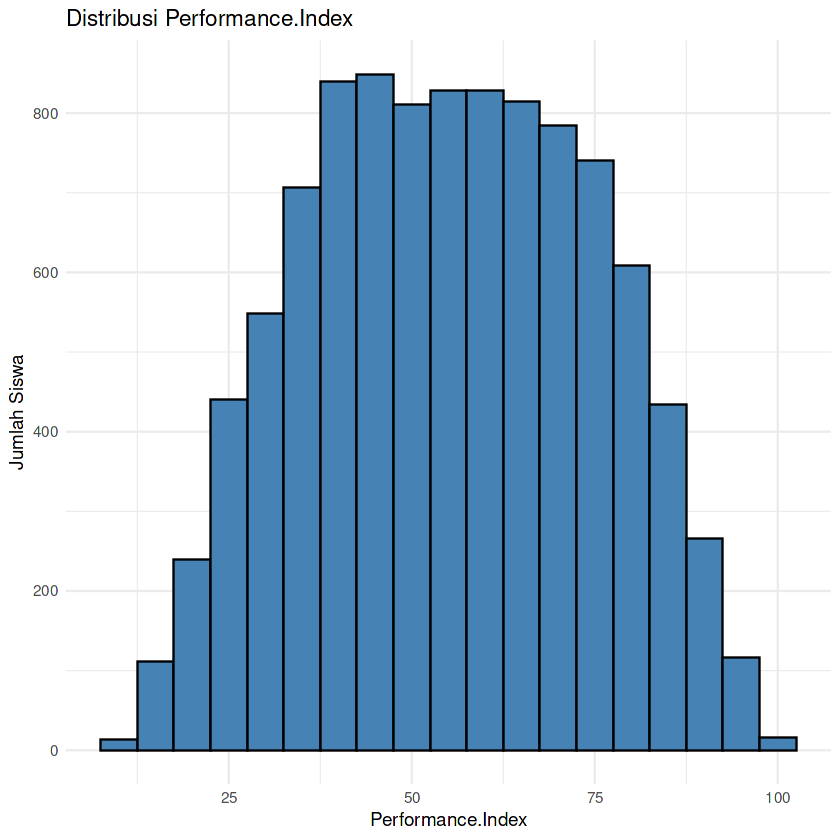

In [5]:
ggplot(data, aes(x = Performance.Index)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  theme_minimal() +
  labs(title = "Distribusi Performance.Index", x = "Performance.Index", y = "Jumlah Siswa")


> Analisis Distribusi Performa

Distribusi **Performance Index** menunjukkan penyebaran nilai siswa berdasarkan interval 5 poin.  
Sebagian besar siswa memiliki performa pada rentang **40–75**, dengan puncak frekuensi di sekitar **45–55**, yang menunjukkan konsentrasi nilai di kisaran menengah.

Distribusi menurun secara bertahap setelah nilai 75, dan hanya sedikit siswa dengan performa di atas 90.  
Pola ini menyerupai **distribusi normal ringan**, dengan sedikit bias ke kiri (*negatively skewed*), sesuai dengan nilai *skewness* yang mendekati nol pada analisis deskriptif sebelumnya.

**Interpretasi singkat:**
- Mayoritas siswa memiliki performa **cukup baik (40–75)**.  
- Hanya sedikit yang berperforma **sangat rendah (<25)** atau **sangat tinggi (>90)**.  
- Tidak ada lonjakan ekstrem, sehingga **distribusi relatif stabil dan simetris**.

## Extracurricular Participation and Student Performance

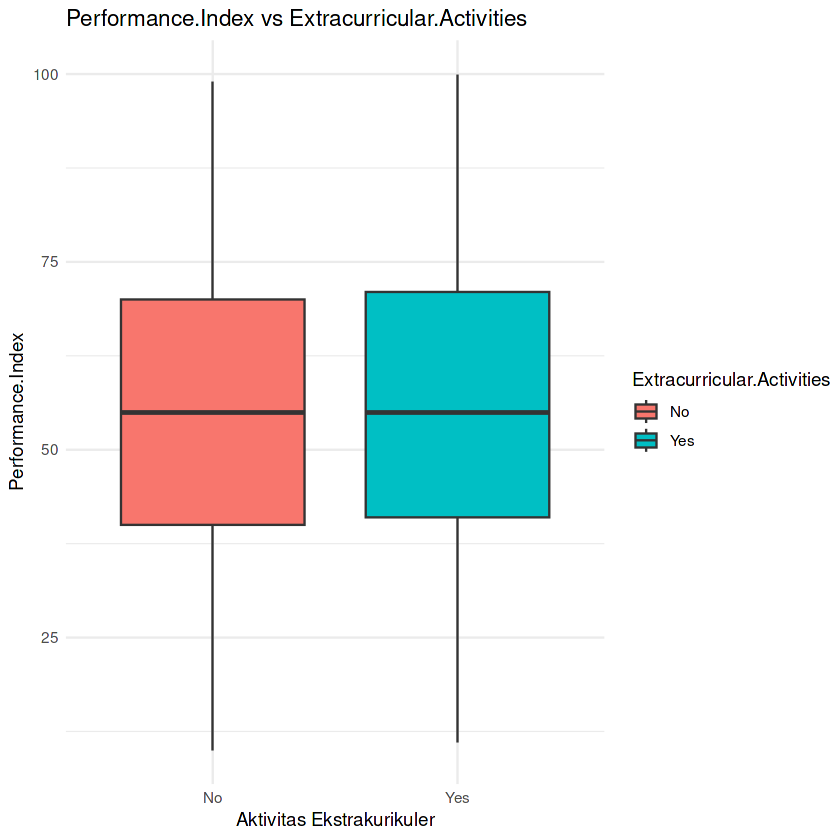

In [6]:
ggplot(data, aes(x = Extracurricular.Activities, y = Performance.Index, fill = Extracurricular.Activities)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Performance.Index vs Extracurricular.Activities", x = "Aktivitas Ekstrakurikuler", y = "Performance.Index")

> Analisis
- Jumlah siswa hampir seimbang antara yang ikut (`Yes`) dan tidak ikut (`No`) ekstrakurikuler.  
- **Rata-rata Performance.Index sedikit lebih tinggi** pada siswa yang ikut ekstrakurikuler (55.7 vs 54.8).  
- Median sama (55), dan variasi nilai (SD) hampir sama di kedua kelompok.  
- Rentang nilai luas di kedua kategori (10–100), menunjukkan distribusi nilai serupa.  

> Intuisi 
- Mengikuti aktivitas ekstrakurikuler sedikit berasosiasi dengan performa lebih tinggi, meskipun perbedaannya tidak besar.  

## Correlation Matrix Visualization

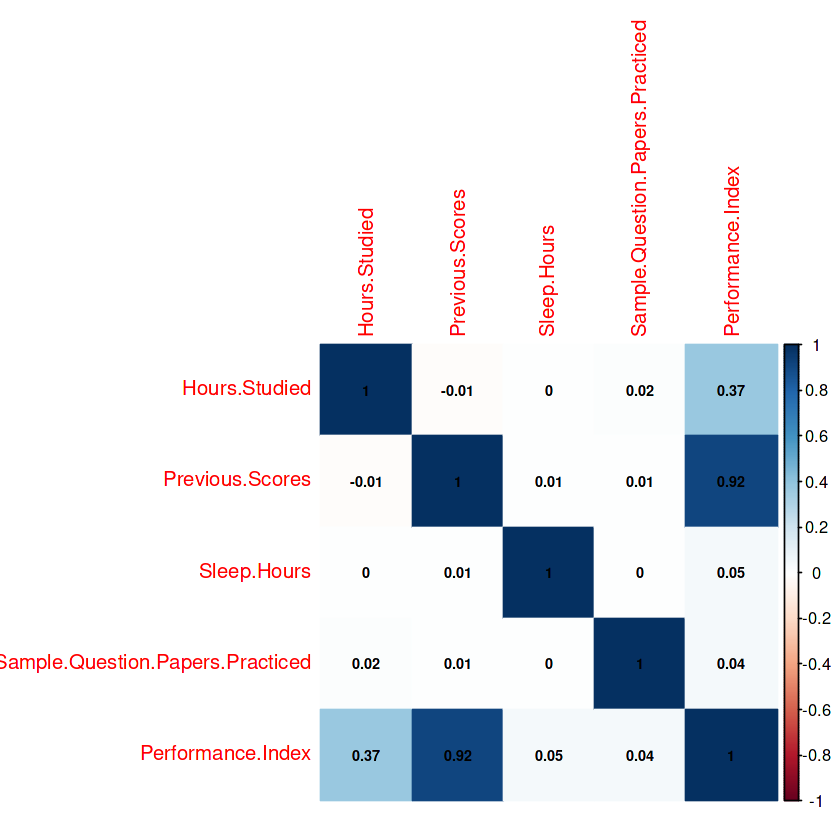

In [7]:
cor_matrix <- cor(data[, numeric_cols])
corrplot(cor_matrix, method = "color", addCoef.col = "black", number.cex = 0.7)

> Analisis Korelasi Variabel Numerik

Berdasarkan tabel korelasi antar variabel numerik:

| Variable1                    | Variable2                    | Correlation |
|-------------------------------|-----------------------------|------------|
| Hours.Studied                 | Performance.Index           | 0.37       |
| Previous.Scores               | Performance.Index           | 0.92       |
| Sample.Question.Papers.Practiced | Performance.Index        | 0.04       |
| Sleep.Hours                   | Performance.Index           | 0.05       |
| Hours.Studied                 | Previous.Scores             | -0.01      |
| Hours.Studied                 | Sample.Question.Papers.Practiced | 0.02  |

> Analisis
- `Previous.Scores` memiliki **korelasi paling kuat dengan Performance.Index** (≈0.92) → nilai sebelumnya sangat memprediksi nilai akhir.  
- `Hours.Studied` juga berasosiasi positif dengan `Performance.Index` (≈0.37) → lebih banyak belajar cenderung meningkatkan performa.  
- `Sample.Question.Papers.Practiced` dan `Sleep.Hours` **korelasi lemah** dengan `Performance.Index` (≈0.04–0.05).  
- Korelasi antar variabel numerik lain umumnya rendah → tidak banyak multikolinearitas yang kuat.  

> Intuisi untuk modeling
- `Previous.Scores` wajib dimasukkan sebagai fitur prediktif utama.  
- `Hours.Studied` bisa menjadi fitur tambahan yang signifikan.  
- Fitur lain bisa diuji, tapi pengaruhnya kecil terhadap skor akhir.


# Data Preparation

## Encoding Categorical Variables

In [8]:
data_ml <- data
data_ml$Extracurricular.Activities <- ifelse(data_ml$Extracurricular.Activities == "Yes", 2, 1)

## Feature Selection and Target Definition

In [9]:
features <- c("Hours.Studied", "Previous.Scores", "Sleep.Hours", 
              "Sample.Question.Papers.Practiced", "Extracurricular.Activities")
target <- "Performance.Index"

X <- data_ml[, features]
y <- data_ml[, target]

## Train-Test Split

In [10]:
set.seed(123)
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_index, ]
X_test  <- X[-train_index, ]
y_train <- y[train_index]
y_test  <- y[-train_index]

# Train Model

## Model Linear Regression

In [11]:
lm_model <- lm(Performance.Index ~ ., data = cbind(X_train, Performance.Index = y_train))
summary(lm_model)

y_pred_lm <- predict(lm_model, newdata = X_test)

rmse_lm <- sqrt(mean((y_test - y_pred_lm)^2))
cat("RMSE Linear Regression:", rmse_lm, "\n")


Call:
lm(formula = Performance.Index ~ ., data = cbind(X_train, Performance.Index = y_train))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6469 -1.3579 -0.0167  1.3506  8.7794 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -34.659916   0.156341 -221.69   <2e-16 ***
Hours.Studied                      2.852255   0.008787  324.61   <2e-16 ***
Previous.Scores                    1.018389   0.001313  775.55   <2e-16 ***
Sleep.Hours                        0.475119   0.013445   35.34   <2e-16 ***
Sample.Question.Papers.Practiced   0.197358   0.007935   24.87   <2e-16 ***
Extracurricular.Activities         0.613911   0.045535   13.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.036 on 7995 degrees of freedom
Multiple R-squared:  0.9887,	Adjusted R-squared:  0.9887 
F-statistic: 1.404e+05 on 5 and 7995 DF,  p-value: < 2.2e-16


RMSE Linear Regression: 2.047862 


> Analisis Linear Regression untuk Prediksi Performance.Index

1. Model Linear Regression

Model yang digunakan:

Performance.Index = -34.66 + 2.85 * Hours.Studied + 1.02 * Previous.Scores + 0.48 * Sleep.Hours + 0.20 * Sample.Question.Papers.Practiced + 0.61 * Extracurricular.Activities

2. Interpretasi Koefisien

| Fitur | Koefisien | Interpretasi |
|-------|-----------|-------------|
| Hours.Studied | 2.85 | Setiap tambahan 1 jam belajar, nilai akhir meningkat ~2.85 poin |
| Previous.Scores | 1.02 | Setiap tambahan 1 poin pada skor sebelumnya, nilai akhir meningkat ~1.02 poin |
| Sleep.Hours | 0.48 | Setiap tambahan 1 jam tidur, nilai akhir meningkat ~0.48 poin |
| Sample.Question.Papers.Practiced | 0.20 | Setiap tambahan 1 latihan soal, nilai akhir meningkat ~0.20 poin |
| Extracurricular.Activities | 0.61 | Siswa ikut kegiatan ekstrakurikuler → nilai meningkat ~0.61 poin |

> Semua koefisien signifikan secara statistik (p-value < 0.001)

3. Evaluasi Model

- Residual Standard Error (RSE): 2.036  
- Multiple R-squared: 0.9887 → menjelaskan ~98.87% variansi nilai akhir  
- RMSE: 2.048 → prediksi sangat dekat dengan nilai aktual  

4. Kesimpulan

- Linear regression sangat efektif untuk dataset ini, terutama karena skor sebelumnya (`Previous.Scores`) merupakan faktor dominan.  
- Fitur tambahan seperti jam belajar, tidur, latihan soal, dan kegiatan ekstrakurikuler memberikan pengaruh positif meski lebih kecil.  
- Model siap digunakan untuk prediksi nilai akhir siswa dan bisa dijadikan baseline sebelum mencoba model non-linear seperti Random Forest atau XGBoost.


## Random Forest

In [12]:
rf_model <- randomForest(x = X_train, y = y_train, ntree = 100)
y_pred_rf <- predict(rf_model, X_test)
rmse_rf <- sqrt(mean((y_test - y_pred_rf)^2))
cat("RMSE Random Forest:", rmse_rf, "\n")

RMSE Random Forest: 8.170582 


> 🔍 Analisis Model Random Forest

📊 Hasil Model
- **Model:** Random Forest Regressor (`ntree = 100`)
- **RMSE:** `8.170582`

🧠 Interpretasi
Model Random Forest menghasilkan **RMSE sebesar 8.17**, yang menunjukkan bahwa rata-rata kesalahan prediksi terhadap nilai aktual adalah sekitar 8 poin.  
Jika dibandingkan dengan model **Linear Regression (RMSE = 2.05)**, performa Random Forest relatif **lebih buruk**.

📈 Analisis Singkat
- Dataset *Student Performance* memiliki hubungan antar variabel yang **sangat linier** (misalnya antara *Hours Studied*, *Previous Scores*, dan *Performance Index*).
- Karena hubungan datanya sederhana dan tidak kompleks, model linear mampu **menangkap pola utama** dengan lebih efisien.
- Model Random Forest justru berpotensi **overfitting atau kurang efisien** pada data seperti ini.

⚙️ Insight Tambahan
Walaupun performa prediksinya lebih rendah, Random Forest tetap bermanfaat untuk:
- Menilai **importance dari setiap fitur**.
- Menjadi pembanding untuk validasi model linear.
- Ditingkatkan lagi dengan **tuning parameter** seperti `mtry`, `ntree`, dan `maxnodes`.

✅ Kesimpulan
| Model              | RMSE    | Keterangan                                    |
|--------------------|---------|-----------------------------------------------|
| Linear Regression  | 2.05    | Performa tinggi, cocok untuk data linier      |
| Random Forest      | 8.17    | Kurang akurat, kemungkinan overfitting ringan |

📌 **Kesimpulan Akhir:**  
Hubungan antar variabel dalam dataset ini bersifat **linier dan sederhana**, sehingga **Linear Regression lebih sesuai** dibanding Random Forest untuk prediksi *Performance Index*.


## XGBoost

In [13]:
dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
dtest  <- xgb.DMatrix(data = as.matrix(X_test), label = y_test)

params <- list(
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 6,
  subsample = 0.8,
  colsample_bytree = 0.8
)

xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 100)

y_pred_xgb <- predict(xgb_model, dtest)

rmse_xgb <- sqrt(mean((y_test - y_pred_xgb)^2))
cat("RMSE XGBoost:", rmse_xgb, "\n")

RMSE XGBoost: 2.131048 


> ⚙️ Analisis Model XGBoost

 📊 Hasil Model
- **Algoritma:** XGBoost Regressor  
- **Parameter utama:**
  - objective = `"reg:squarederror"`
  - eta (learning rate) = `0.1`
  - max_depth = `6`
  - subsample = `0.8`
  - colsample_bytree = `0.8`
  - nrounds = `100`
- **RMSE:** `2.131048`

---

🧠 Interpretasi
Model XGBoost menghasilkan **RMSE sebesar 2.13**, yang sangat mendekati performa **Linear Regression (RMSE = 2.05)**.  
Ini menunjukkan bahwa model XGBoost mampu **belajar pola hubungan antar fitur dengan sangat baik**, bahkan pada data yang dominan linier.

---

📈 Analisis Singkat
- Model XGBoost bekerja menggunakan pendekatan **gradient boosting**, di mana banyak model pohon kecil (weak learners) digabung secara bertahap untuk memperbaiki kesalahan model sebelumnya.
- Dengan parameter moderat (depth = 6 dan learning rate = 0.1), model ini seimbang antara **bias dan varians**, sehingga hasilnya stabil.
- RMSE yang hampir sama dengan model linier menandakan bahwa **hubungan antar fitur cukup linier**, tapi XGBoost masih bisa menangkap sedikit kompleksitas tambahan.

---

✅ Kesimpulan Perbandingan Model
| Model               | RMSE    | Interpretasi                                      |
|---------------------|---------|---------------------------------------------------|
| Linear Regression   | 2.05    | Akurasi tinggi, cocok untuk hubungan linier       |
| Random Forest       | 8.17    | Kurang akurat, kemungkinan overfitting ringan     |
| XGBoost             | 2.13    | Akurasi sangat baik, mampu menangkap variasi halus |

📌 **Kesimpulan Akhir:**  
Model **XGBoost** menunjukkan performa prediksi **setara dengan Linear Regression**, bahkan sedikit lebih fleksibel dalam menangani pola non-linier kecil.  
Keduanya sama-sama efektif untuk dataset *Student Performance*, namun **XGBoost lebih unggul untuk generalisasi** jika data nanti lebih kompleks.
